This notebook compares the spike sorting results for two sessions using two different pre-processing band-pass filters: 300-6000kHz and 300-4500kHz. The goal is to confirm that the artifact at 5kHz has been removed and that the spike shapes show no artifact oscillations.

**_Note: The key results have been modified between the two sections of this notebook, so the results from the first section are not reproducible in the second section. The first section was processed with the band-pass filter set to <6kHz, while the second section uses updated results with the band-pass filter set to <4.5kHz._**


In [1]:
import os

if os.path.basename(os.getcwd()) == "illustration":
    os.chdir("..")
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.widgets as sw
import matplotlib.pyplot as pl

In [3]:
from workflow.utils.paths import (
    get_ephys_root_data_dir,
    get_raw_root_data_dir,
    get_processed_root_data_dir,
)
from element_interface.utils import dict_to_uuid, find_full_path, find_root_directory

from workflow.pipeline import *

[2024-06-12 20:30:58,027][INFO]: Connecting milagros@db.datajoint.com:3306
[2024-06-12 20:30:59,757][INFO]: Connected milagros@db.datajoint.com:3306


### Sessions


In [4]:
key1 = dict(
    organoid_id="O09",
    experiment_start_time="2023-05-18 12:25:00",
    insertion_number=0,
    start_time="2023-05-18 12:25:00",
    end_time="2023-05-18 12:30:00",
    paramset_idx=1,
)

In [8]:
ephys.ClusteringTask & key1

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,O09-12_raw/202305181225_202305181230/O09/spykingcircus2_1


In [5]:
key2 = dict(
    organoid_id="O09",
    experiment_start_time="2023-05-19 09:30:00",
    insertion_number=0,
    start_time="2023-05-19 10:00:00",
    end_time="2023-05-19 10:05:00",
    paramset_idx=1,
)

In [10]:
ephys.ClusteringTask & key2

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,O09-12_raw/202305191000_202305191005/O09/spykingcircus2_1


## 1. Results from band-pass filter <6kHz


#### Key1


In [46]:
ephys.CuratedClustering.Unit & key1

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,0,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,n.a.,9579,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,1,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,15,n.a.,10666,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,2,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,16,n.a.,13000,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,3,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,26,n.a.,10915,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,4,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,27,n.a.,10934,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,5,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,17,n.a.,14963,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,6,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,n.a.,12158,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,7,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,18,n.a.,7766,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,8,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,30,n.a.,9028,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,9,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,19,n.a.,13591,=BLOB=,=BLOB=,=BLOB=


In [72]:
ephys.CuratedClustering.Unit & key2

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,0,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,21,n.a.,8428,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,1,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,23,n.a.,10382,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,2,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,22,n.a.,10016,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,3,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,n.a.,8182,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,4,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,19,n.a.,9488,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,5,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,24,n.a.,12077,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,6,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,12,n.a.,1732,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,7,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,n.a.,8393,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,8,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,17,n.a.,11080,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,9,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,n.a.,9710,=BLOB=,=BLOB=,=BLOB=


In [48]:
ephys.WaveformSet & key1

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1


In [52]:
peak_wfs = (ephys.WaveformSet.PeakWaveform & key1).fetch("peak_electrode_waveform")
sample_rate = (ephys.EphysSessionInfo & key1).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

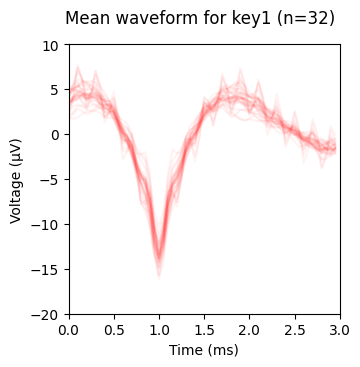

In [54]:
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.05)
plt.suptitle(f"Mean waveform for key1 with filter<6kHz (n={len(peak_wfs)})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

In [73]:
ephys.WaveformSet & key2

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1


In [80]:
peak_wfs2 = (ephys.WaveformSet.PeakWaveform & key2).fetch("peak_electrode_waveform")
sample_rate2 = (ephys.EphysSessionInfo & key2).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps2 = np.arange(len(peak_wfs2[0])) / sample_rate2  # ms

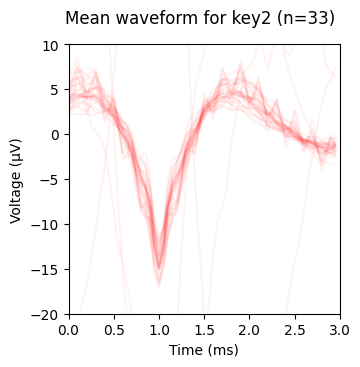

In [81]:
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs2)):
    plt.plot(peak_wf_timestamps2, peak_wfs2[idx], color="red", alpha=0.05)
plt.suptitle(f"Mean waveform for key2 (n={len(peak_wfs2)})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

In [70]:
query1 = ephys.QualityMetrics.Cluster & key1
query2 = ephys.QualityMetrics.Cluster & key2

In [16]:
def plot_metric(
    ax,
    data,
    bins,
    x_axis_label=None,
    title=None,
    color="k",
    smoothing=True,
    density=False,
):
    """A function modified from https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_quality_metrics.html"""
    from scipy.ndimage import gaussian_filter1d

    if any(data) and np.nansum(data):
        h, b = np.histogram(data, bins=bins, density=density)
        x = b[:-1]

        y = gaussian_filter1d(h, 1) if smoothing else h
        ax.plot(x, y, color=color)
        ax.set_xlabel(x_axis_label)
        ax.set_ylim([0, None])
    ax.set_title(title)
    ax.spines[["right", "top"]].set_visible(False)

In [17]:
def plot_histograms(key, query):
    fig, axes = plt.subplots(4, 4, figsize=(25, 10))
    axes = axes.flatten()
    plt.suptitle(f"Cluster Quality Metrics for {key}", y=0.99, fontsize=14)

    # Firing Rates
    data = np.log10(query.fetch("firing_rate"))
    bins = np.linspace(-3, 6, 100)  # from 0.001 Hz to 100 Hz.
    plot_metric(axes[0], data, bins, title="Firing Rate (Hz) (log$_{10}$)")
    axes[0].set_ylabel("Count")

    # Signal-to-Noise Ratio
    data = query.fetch("snr")
    bins = np.linspace(0, 10, 100)  # signal quality: the better the higher
    plot_metric(axes[1], data, bins, title="Signal-to-Noise Ratio")

    # Presence Ratio
    data = query.fetch("presence_ratio")
    bins = np.linspace(
        0, 1, 100
    )  # a high presence (1) may indicate strong and consistent signal, neuron active
    plot_metric(
        axes[2],
        data,
        bins,
        title="Presence Ratio",
    )

    # ISI Violation
    data = query.fetch("isi_violation")
    bins = np.linspace(
        0, 1, 100
    )  # proportion of spikes that occur within a certain short interval (violating the refractory period of a neuron). High value may suggest presence of noise. For neural recordings, a lower ISI Violation ratio is usually preferred because it indicates higher quality data where detected spikes are less likely to be false positives.
    plot_metric(
        axes[3],
        data,
        bins,
        title="ISI Violation",
    )

    # Number Violation
    data = query.fetch("number_violation")
    bins = np.linspace(
        0, 10000, 100
    )  # close to 1000 poor spike sorting or high noise levels.
    plot_metric(
        axes[4],
        data,
        bins,
        title="Number Violation",
    )
    axes[4].set_ylabel("Count")

    # Amplitude Cutoff
    data = query.fetch("amplitude_cutoff")
    bins = np.linspace(
        0, 0.5, 100
    )  # higher value suggests potential issues with spike detection, such as noise or missed spikes.
    plot_metric(
        axes[5],
        data,
        bins,
        title="Amplitude Cutoff",
    )

    # Isolation Distance
    data = query.fetch("isolation_distance")
    bins = np.linspace(
        0, 170, 50
    )  # higher value suggests detected spikes are well-separated from noise and other neurons, implying high-quality spike sorting.
    plot_metric(
        axes[6],
        data,
        bins,
        title="Isolation Distance",
    )

    # L-Ratio
    data = query.fetch("l_ratio")
    bins = np.linspace(
        0, 1, 100
    )  # lower value indicates better separation between clusters of spikes.
    plot_metric(axes[7], data, bins, title="L-Ratio")

    # d-Prime
    data = query.fetch("d_prime")
    bins = np.linspace(
        0, 15, 50
    )  # measure used in signal detection theory to quantify the ability of an observer to distinguish between signal and noise. Higher values indicate better separation between clusters of spikes.
    plot_metric(axes[8], data, bins, title="d-Prime")
    axes[8].set_ylabel("Count")

    # Nearest-Neighbors Hit Rate
    data = query.fetch("nn_hit_rate")
    bins = np.linspace(
        0, 1, 100
    )  # A higher Nearest-Neighbors Hit Rate indicates better clustering or classification performance
    plot_metric(
        axes[9],
        data,
        bins,
        title="Nearest-Neighbors Hit Rate",
    )

    # Nearest-Neighbors Miss Rate
    data = query.fetch("nn_miss_rate")
    bins = np.linspace(
        0, 1, 100
    )  # a lower Nearest-Neighbors Miss Rate indicates better clustering or classification performance, as it suggests that the nearest neighbors tend to belong to the same class or cluster.
    plot_metric(
        axes[10],
        data,
        bins,
        title="Nearest-Neighbors Miss Rate",
    )

    # Silhouette Score
    data = query.fetch("silhouette_score")
    bins = np.linspace(
        -1, 1, 100
    )  # It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
    plot_metric(axes[11], data, bins, title="Silhouette Score")

    # Max Drift
    data = query.fetch("max_drift")
    bins = np.linspace(
        0, 100, 100
    )  # It measures the amount of movement or displacement of the recording electrode during the experiment. A high value may indicate that the electrode was not stable during the recording session.
    plot_metric(
        axes[12],
        data,
        bins,
        title="Max Drift",
    )
    axes[12].set_ylabel("Count")

    # Cumulative Drift
    data = query.fetch("cumulative_drift")
    bins = np.linspace(
        0, 100, 100
    )  # total movement or displacement of the recording electrode throughout the experiment duration
    plot_metric(
        axes[13],
        data,
        bins,
        title="Cumulative drift",
    )

    # Contamination Rate
    data = query.fetch("contamination_rate")
    bins = np.linspace(
        0, 1, 100
    )  # percentage of data points in a cluster that are not members of that cluster. A high contamination rate may indicate that the cluster contains a significant number of spikes from other neurons.
    plot_metric(axes[14], data, bins, title="Contamination Rate")

    [ax.remove() for ax in axes[15:]]
    plt.tight_layout()

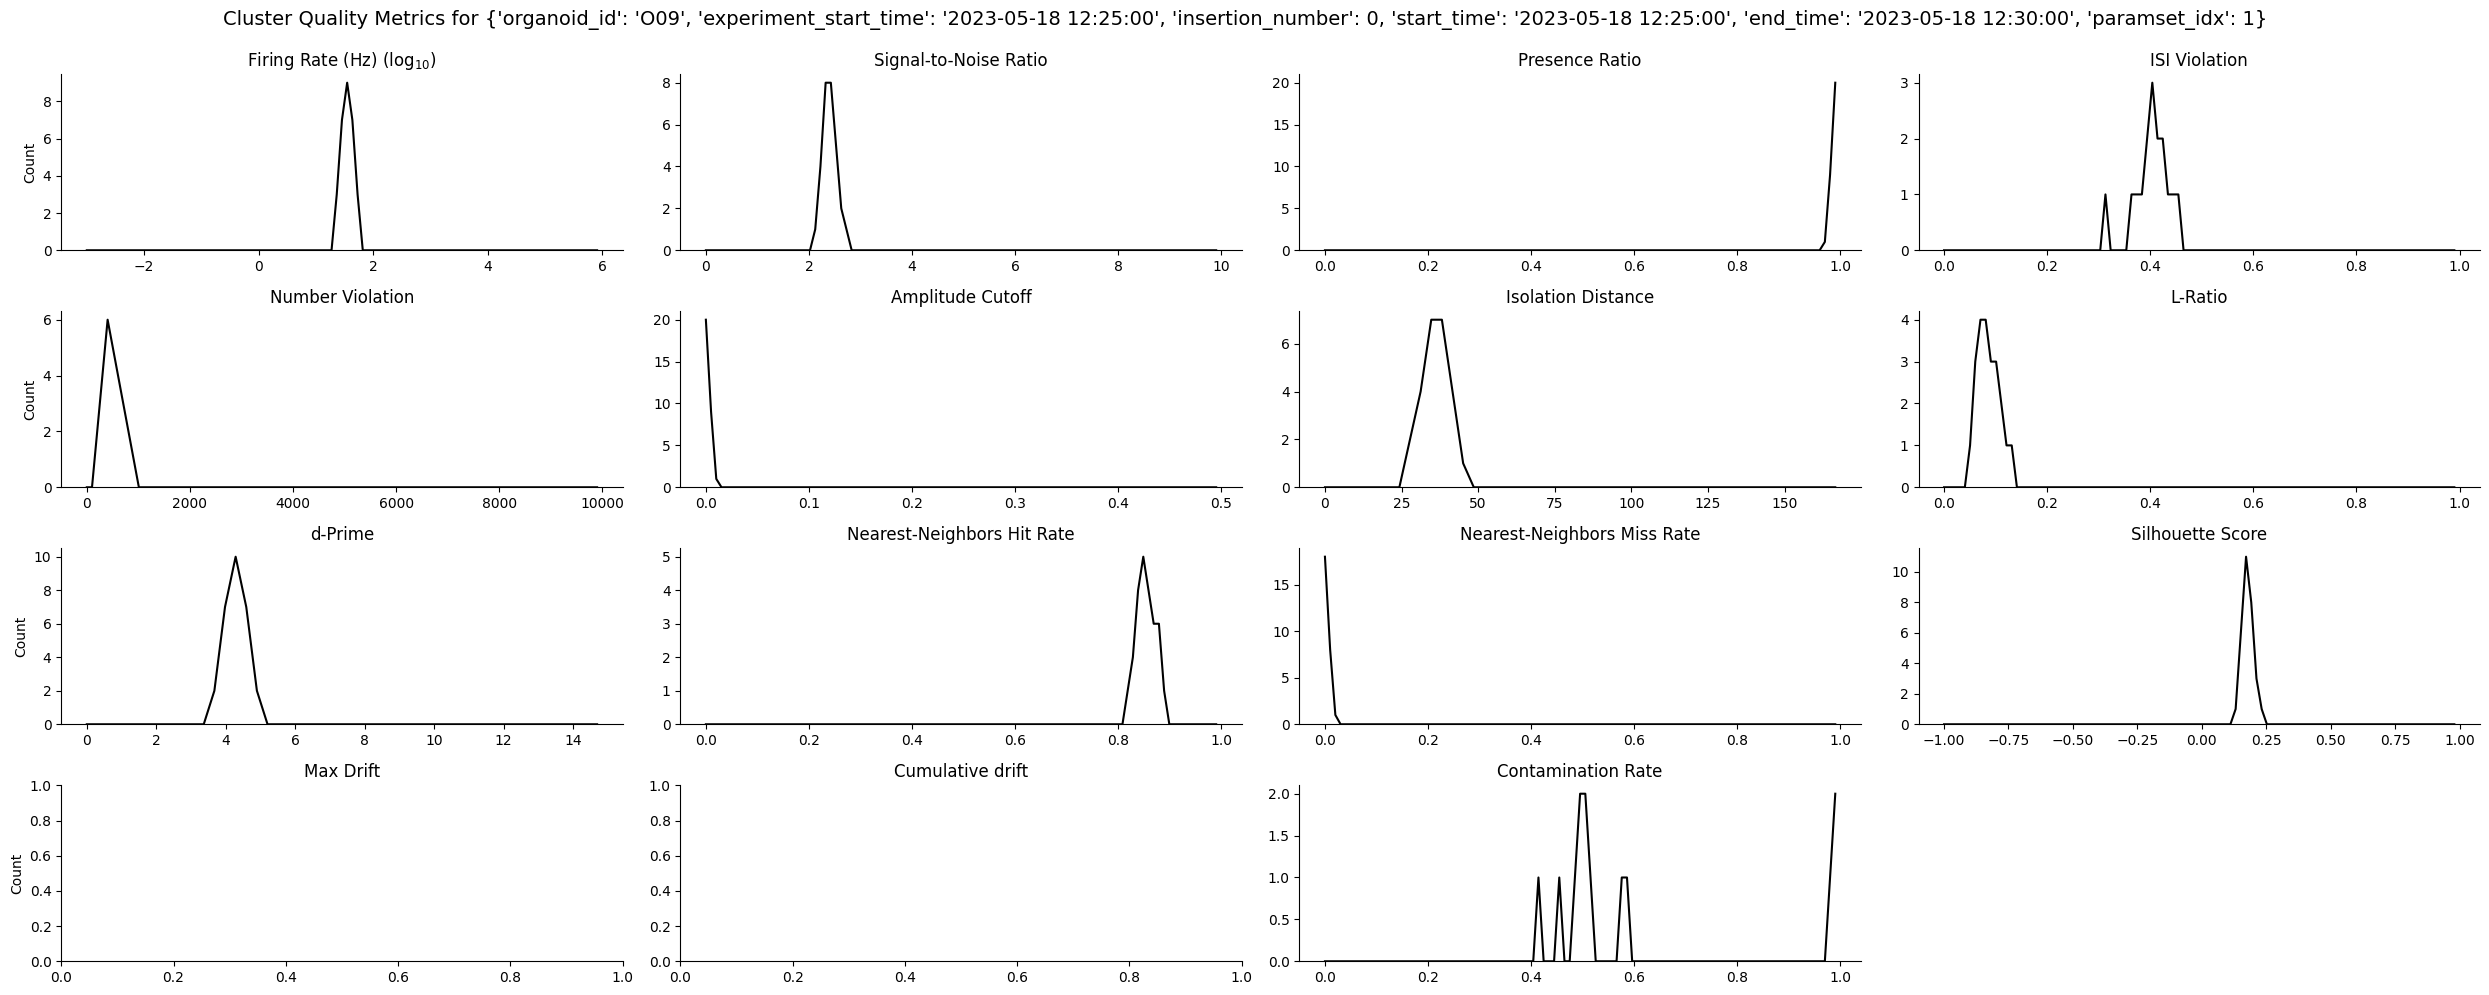

In [69]:
plot_histograms(key1, query1)

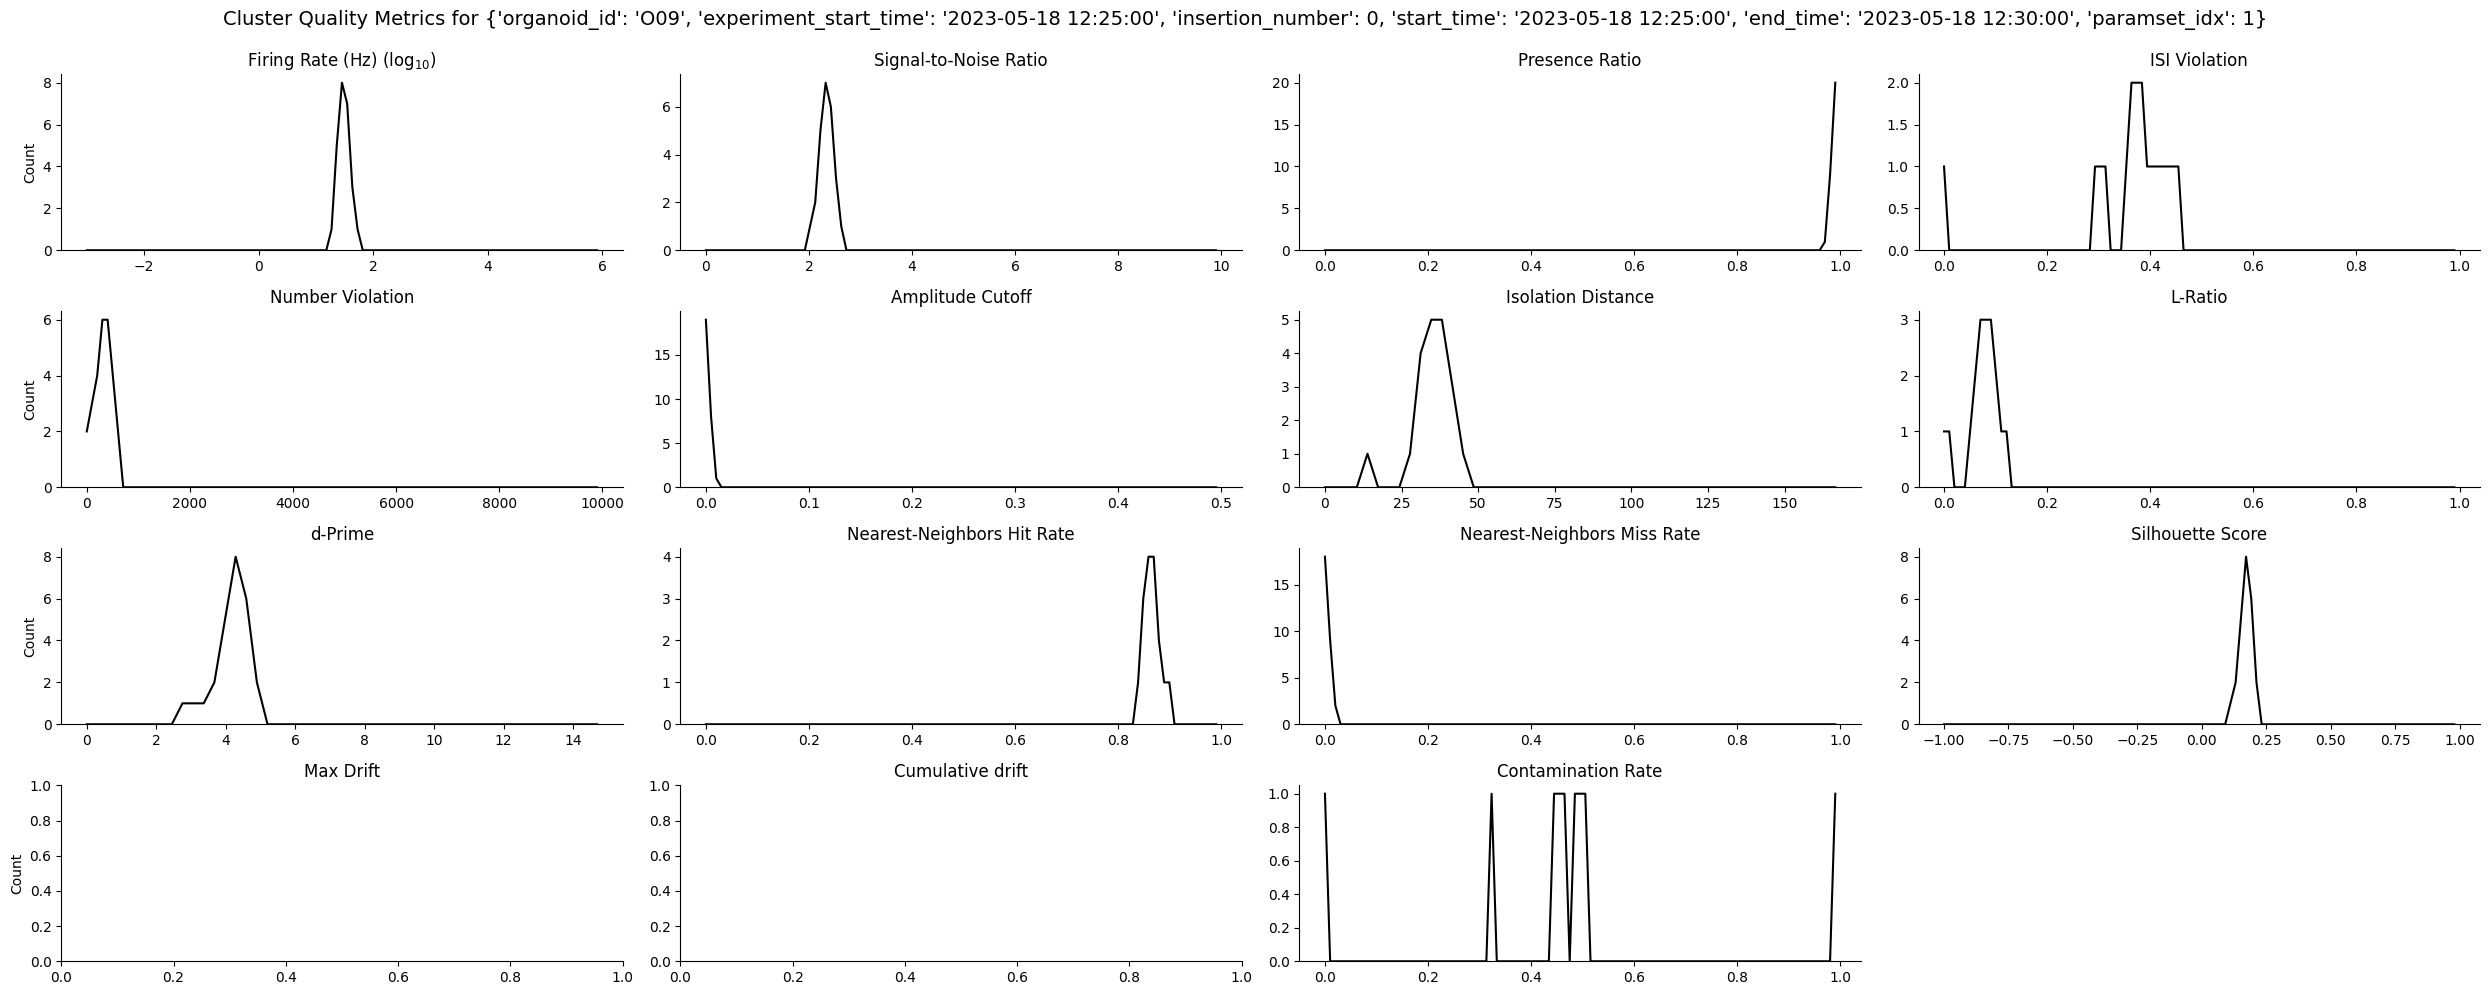

In [71]:
plot_histograms(key1, query2)

## 2. Results from band-pass filter <4.5kHz


In [6]:
ephys.CuratedClustering.Unit & key1

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,0,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,n.a.,9861,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,1,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,19,n.a.,9926,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,2,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,30,n.a.,8942,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,3,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,15,n.a.,9855,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,4,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,n.a.,11396,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,5,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,27,n.a.,10853,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,6,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,17,n.a.,13035,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,7,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,n.a.,9692,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,8,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,18,n.a.,7641,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,9,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,20,n.a.,11495,=BLOB=,=BLOB=,=BLOB=


In [7]:
ephys.CuratedClustering.Unit & key2

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,0,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,22,n.a.,10572,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,1,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,24,n.a.,12032,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,2,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,21,n.a.,8078,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,3,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,23,n.a.,9004,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,4,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,n.a.,9705,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,5,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,n.a.,8751,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,6,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,17,n.a.,10365,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,7,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,n.a.,10255,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,8,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,20,n.a.,11179,=BLOB=,=BLOB=,=BLOB=
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1,9,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,14,n.a.,11525,=BLOB=,=BLOB=,=BLOB=


In [8]:
ephys.WaveformSet & key1

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1


In [9]:
peak_wfs = (ephys.WaveformSet.PeakWaveform & key1).fetch("peak_electrode_waveform")
sample_rate = (ephys.EphysSessionInfo & key1).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sample_rate  # ms

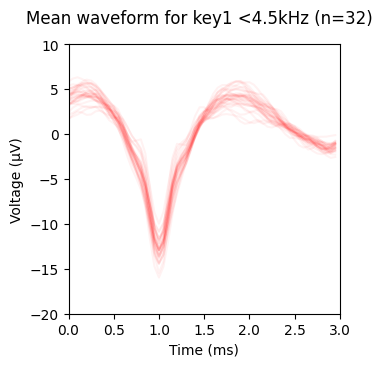

In [22]:
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.05)
plt.suptitle(f"Mean waveform for key1 <4.5kHz (n={len(peak_wfs)})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

In [11]:
ephys.WaveformSet & key2

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O09,2023-05-19 09:30:00,0,2023-05-19 10:00:00,2023-05-19 10:05:00,1


In [12]:
peak_wfs2 = (ephys.WaveformSet.PeakWaveform & key2).fetch("peak_electrode_waveform")
sample_rate2 = (ephys.EphysSessionInfo & key2).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps2 = np.arange(len(peak_wfs2[0])) / sample_rate2  # ms

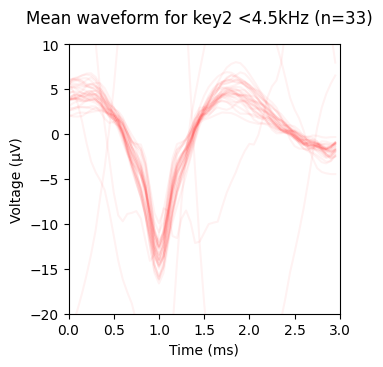

In [21]:
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs2)):
    plt.plot(peak_wf_timestamps2, peak_wfs2[idx], color="red", alpha=0.05)
plt.suptitle(f"Mean waveform for key2 <4.5kHz (n={len(peak_wfs2)})")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.xlim(0, 3)
plt.ylim(-20, 10)
plt.show()

In [18]:
query1 = ephys.QualityMetrics.Cluster & key1
query2 = ephys.QualityMetrics.Cluster & key2

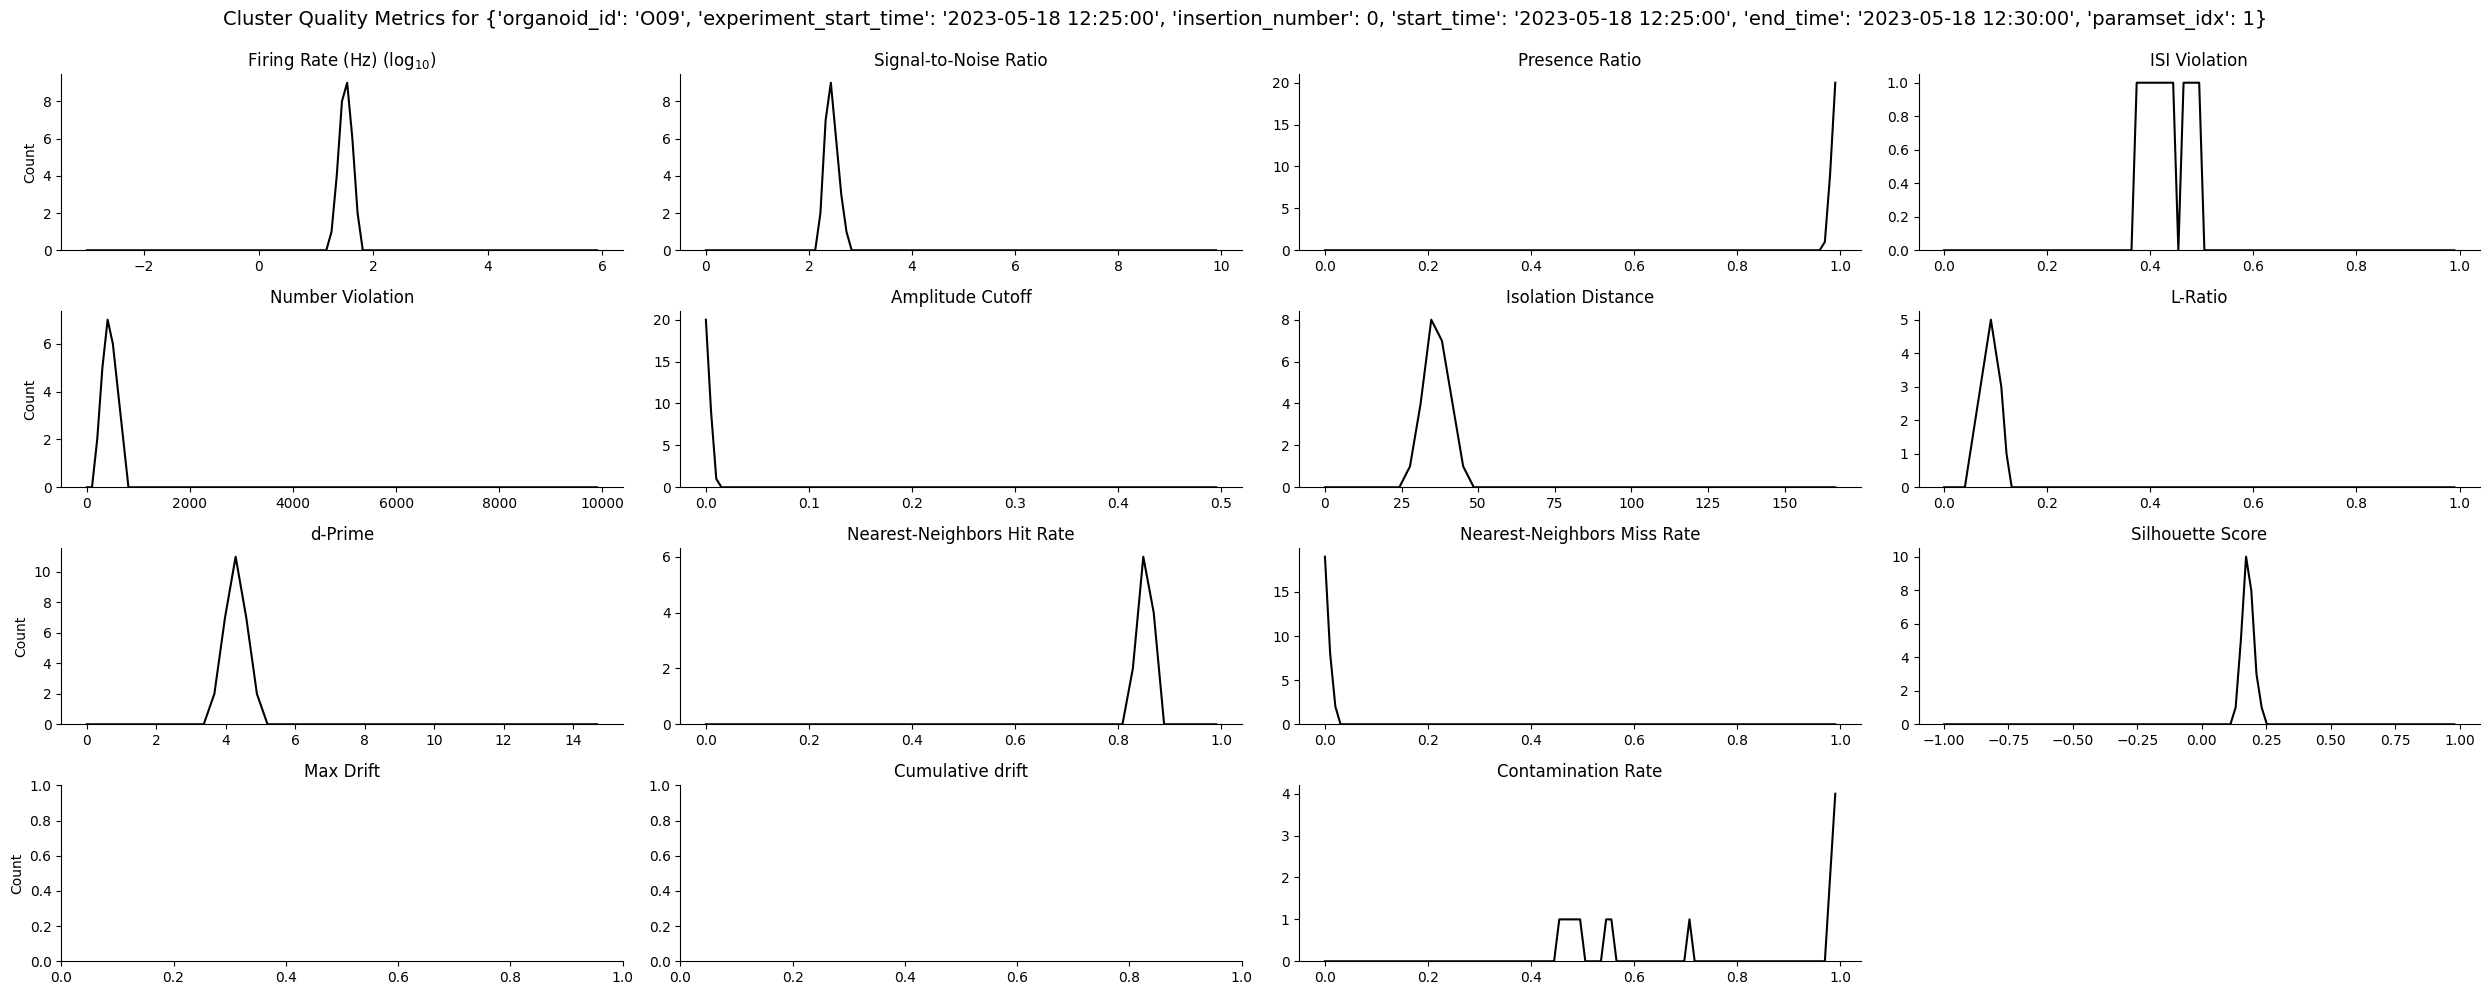

In [19]:
plot_histograms(key1, query1)

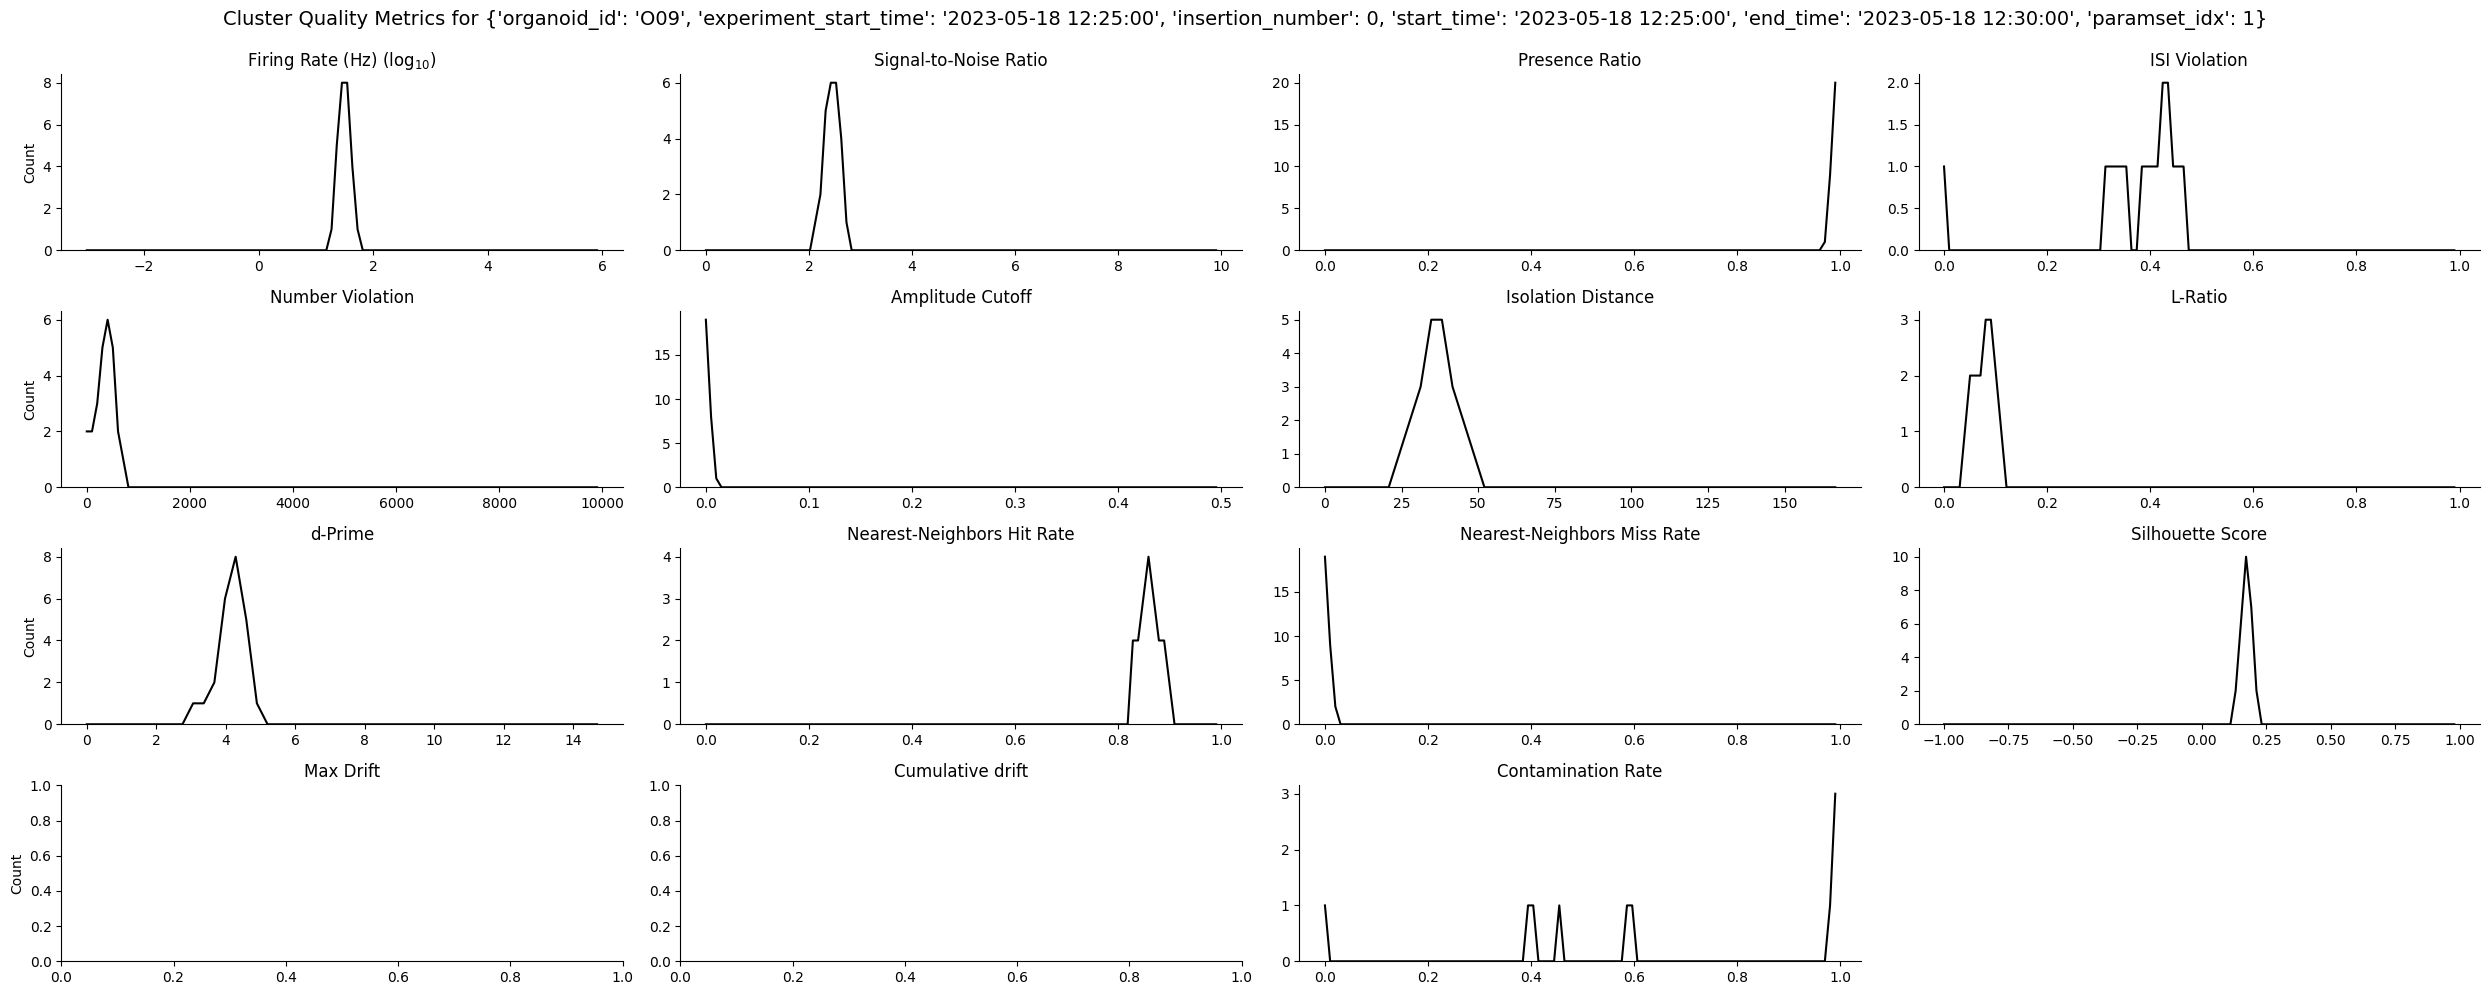

In [20]:
plot_histograms(key1, query2)